# Cluster Analysis




In [1]:
import sys
sys.path.append("..")
from benchmark.results import load_all_results
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, rand_score


sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
sns.set_style("whitegrid")
palette = sns.color_palette("colorblind")

In [2]:
dataset = 'pamap2' # 'glove', 'gist', 'pamap2', 'household', 'mnist', 'celeba', 'census, 'aloi'
exact_algorithm = 'tpedbscan' # for high-dimensional datasets, this has to be 'faiss'

data = []
data2 = []

# load all the results that are available for the dataset
for f in load_all_results(dataset, ".."):
    # filter by the exact algorithm
    if f.attrs['algo'] == exact_algorithm and f.attrs['minPts'] == 100:
        labels = np.array(f['labels'])
        points_clustered = len([x for x in np.array(labels) if x >= 0])
        largest_cluster_size = 0
        if len(labels[labels > -1]) > 0:
            largest_cluster_size = max(Counter(labels[labels > -1]).values())/len(labels)
        data.append({
            "eps": f.attrs['eps'],
            "minPts": f.attrs['minPts'],
            "n": len(labels),
            "num_clusters": len(set(labels)),
            "largest_cluster_size": largest_cluster_size, 
            "num_corepoints": len(f['corepoints']),
            "num_noncorepoints": len(labels) - len(f['corepoints']),
            "points_clustered": points_clustered,
            "fraction_clustered": points_clustered/len(labels),
            "fraction_noise": len([x for x in np.array(labels) if x < 0])/len(labels),
            "cluster_sizes": sorted(Counter(labels[labels > -1]).values(),reverse=True),
            #"Params": f.attrs['params'],
            #"time": f.attrs['time'],
            })
    if f.attrs['algo'] == 'srrdbscan' and 'delta=0.1' in f.attrs['params'] and 'approx=1.0' in f.attrs['params'] and f.attrs['minPts'] == 100:
        data2.append({
            "eps": f.attrs['eps'],
            "time": f.attrs['time'],
            "Params": f.attrs['params'],
            })

df = pd.DataFrame(data=data)
df2 = pd.DataFrame(data=data2)
df

,eps,minPts,n,num_clusters,largest_cluster_size,num_corepoints,num_noncorepoints,points_clustered,fraction_clustered,fraction_noise,cluster_sizes
0,30.0,100,2872533,3,0.908586,2869907,2626,2871854,0.999764,0.000236,"[2609942, 261912]"
1,0.8,100,2872533,504,0.010317,589587,2282946,718996,0.250300,0.749700,"[29637, 26171, 21615, 20614, 19957, 19513, 191..."
2,7.0,100,2872533,83,0.882400,2685479,187054,2756090,0.959463,0.040537,"[2534723, 144326, 20093, 18221, 7941, 3867, 20..."
3,0.1,100,2872533,6,0.000940,831,2871702,3280,0.001142,0.998858,"[2699, 180, 162, 138, 101]"
4,20.0,100,2872533,8,0.908269,2861885,10648,2869277,0.998867,0.001133,"[2609034, 255467, 2034, 1852, 398, 262, 230]"
5,3.0,100,2872533,275,0.725987,2243553,628980,2399139,0.835200,0.164800,"[2085422, 79049, 21269, 20041, 18932, 8681, 61..."
6,1.0,100,2872533,582,0.012566,691214,2181319,844337,0.293935,0.706065,"[36095, 32812, 26221, 21940, 21666, 20871, 199..."
7,0.3,100,2872533,100,0.007685,187922,2684611,267825,0.093237,0.906763,"[22074, 21136, 19760, 17751, 17628, 17601, 144..."
8,0.5,100,2872533,276,0.008996,384776,2487757,505095,0.175836,0.824164,"[25842, 21447, 19949, 18971, 18588, 18105, 170..."
9,2.0,100,2872533,419,0.560015,1746390,1126143,2017467,0.702330,0.297670,"[1608662, 41344, 30961, 30515, 21157, 19981, 1..."


In [3]:
df2.sort_values('eps')

,eps,time,Params
4,0.1,26.048319,"SRRDBSCAN(delta=0.1, memory=5, threads=56, shr..."
8,0.3,17.789906,"SRRDBSCAN(delta=0.1, memory=5, threads=56, shr..."
9,0.5,15.369671,"SRRDBSCAN(delta=0.1, memory=5, threads=56, shr..."
1,0.8,25.444570,"SRRDBSCAN(delta=0.1, memory=5, threads=56, shr..."
7,1.0,45.677671,"SRRDBSCAN(delta=0.1, memory=5, threads=56, shr..."
11,1.2,40.078989,"SRRDBSCAN(delta=0.1, memory=5, threads=56, shr..."
15,1.5,45.602275,"SRRDBSCAN(delta=0.1, memory=5, threads=56, shr..."
10,2.0,84.230808,"SRRDBSCAN(delta=0.1, memory=5, threads=56, shr..."
6,3.0,133.702935,"SRRDBSCAN(delta=0.1, memory=5, threads=56, shr..."
12,5.0,81.870204,"SRRDBSCAN(delta=0.1, memory=5, threads=56, shr..."


Text(0.5, 1.0, 'Number of clusters for pamap2 with minPts=100')

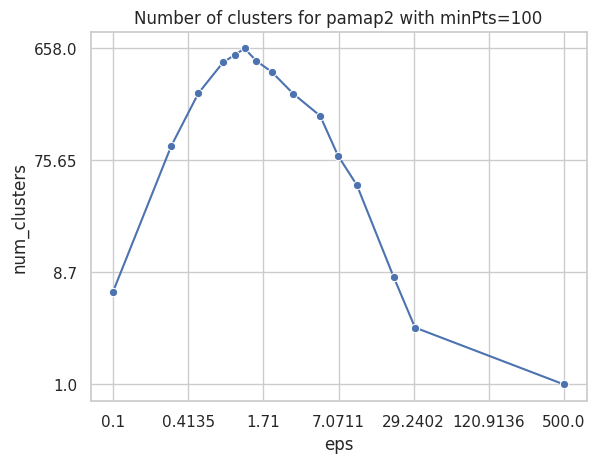

In [4]:
minPts = 100

# sns.set(style="darkgrid")
x_log_min = np.log10(min(df['eps']))
x_log_max = np.log10(max(df['eps']))
xticks = np.logspace(x_log_min, x_log_max, num = 7)
xticks = [round(x, 4) for x in xticks]

y_log_min = np.log10(min(df['num_clusters']))
y_log_max = np.log10(max(df['num_clusters']))
yticks = np.logspace(y_log_min, y_log_max, num = 4)
yticks = [round(x, 2) for x in yticks]

ax = sns.lineplot(data=df, x='eps', y='num_clusters', marker='o')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.minorticks_on()
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
plt.title(f"Number of clusters for {dataset} with minPts={minPts}")


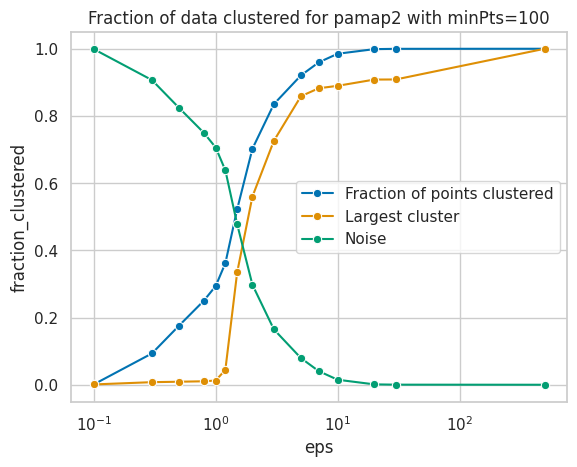

In [5]:
ax = sns.lineplot(data=df, x='eps', y='fraction_clustered', marker='o', label="Fraction of points clustered", color=palette[0])
sns.lineplot(ax=ax, data=df, x='eps', y='largest_cluster_size', marker='o', label="Largest cluster", color=palette[1])
sns.lineplot(ax=ax, data=df, x='eps', y='fraction_noise', marker='o', label="Noise", color=palette[2])
#ax.set_yscale('log')
ax.set_xscale('log')
ax.minorticks_on()
plt.title(f"Fraction of data clustered for {dataset} with minPts={minPts}")
plt.legend()

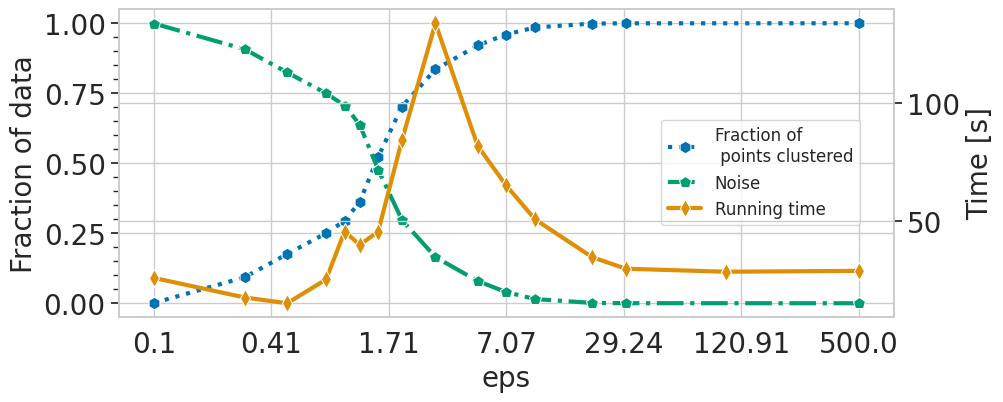

In [6]:
fontsize = 20
ms = 9
thickness = 3
x_log_min = np.log10(min(df2['eps']))
x_log_max = np.log10(max(df2['eps']))

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

ax = sns.lineplot(data=df, x='eps', y='fraction_clustered', 
            marker='h', 
            ms=ms,
            label="Fraction of \n points clustered",
            linestyle=":",
            linewidth=thickness, 
            color=palette[0])
sns.lineplot(ax=ax, data=df, x='eps', y='fraction_noise', 
             marker='p', 
             label="Noise", 
             ms=ms,
             linestyle="-.",
             linewidth=thickness,
             color=palette[2])
ax2 = plt.twinx()
sns.lineplot(ax=ax2, data=df2, x='eps', y='time', 
             marker='d', 
             ms=ms,
             label="Running time", 
             linewidth=thickness,
             color=palette[1])
#ax.set_yscale('log')
#ax.set_xlim(1000) # for mnist
ax.set_xscale('log')
ax.set_ylabel('Fraction of data' , fontsize=fontsize)
#ax.get_yaxis().set_visible(False)
ax2.set_ylabel('Time [s]' , fontsize=fontsize)
ax.set_xlabel('eps', fontsize=fontsize)
ax.minorticks_on()

# Collect handles and labels from both axes
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the handles and labels
handles += handles2
labels += labels2

# Setting gridlines and ticks
xticks = np.logspace(x_log_min, x_log_max, num = 7)
xticks = [round(x, 2) for x in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=fontsize)
ax.yaxis.set_tick_params(labelsize = fontsize)
ax2.yaxis.set_tick_params(labelsize = fontsize)

# Create a single legend
ax2.get_legend().remove()
ax.legend(handles, labels, fontsize=12, loc=(0.7, 0.30))

# Cluster Quality

In [24]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

dataset = 'pamap2'

exact_algorithm = 'tpedbscan'

In [56]:
data = []

exact_data = {}
for f in load_all_results(dataset, ".."):
    if f.attrs['algo'] == exact_algorithm:
        exact_data[f.attrs['eps']] = (np.array(f['labels']), np.array(f['corepoints']), np.array(f['borderpoints']))
    else:
        data.append({
            "clustering": np.array(f['labels']),
            "time": f.attrs['time'],
            "algo": f.attrs['algo'],
            "minPts": f.attrs['minPts'],
            "eps": f.attrs['eps'],
            "params": f.attrs.get("params", "")
        })


metrics = []

for eps, (gt_labels, corepoints, borderpoints) in exact_data.items():
    filtered_data = [d for d in data if d['eps'] == eps]
    # remove border points
    gt_labels[borderpoints] = -1
    for d in filtered_data:
        if d['minPts'] == 100:
            if "delta=0.1" in d['params']:
                if "approx=1.0" in d['params']:   
                    labels = d["clustering"]
                    labels[borderpoints] = -1
                    metrics.append({
                        "eps": eps,
                        "time": d['time'],
                        "algo": d["algo"],
                        "ARI": adjusted_rand_score(gt_labels, labels),
                        "NMI": normalized_mutual_info_score(gt_labels, labels),
                        "params": d.get("params", "")
                    })
            else:
                labels = d["clustering"]
                labels[borderpoints] = -1
                metrics.append({
                    "eps": eps,
                    "time": d['time'],
                    "algo": d["algo"],
                    "ARI": adjusted_rand_score(gt_labels, labels),
                    "NMI": normalized_mutual_info_score(gt_labels, labels),
                    "params": d.get("params", "")
                    })
        

quality_df = pd.DataFrame(metrics)
quality_df.sort_values(by=["eps", "ARI", "NMI"])

,eps,time,algo,ARI,NMI,params
19,0.1,11.405930,srrdbscan,0.146132,0.089265,"SRRDBSCAN(delta=0.5, memory=5, threads=56, shr..."
16,0.1,26.048319,srrdbscan,0.151143,0.094534,"SRRDBSCAN(delta=0.1, memory=5, threads=56, shr..."
17,0.1,962.089766,srrdbscan,0.152205,0.095888,"SRRDBSCAN(delta=0.01, memory=5, threads=56, sh..."
18,0.1,81.891832,srrdbscan,0.152918,0.087612,"SRRDBSCAN(delta=0.9, memory=5, threads=56, shr..."
21,0.1,8471.387872,faiss,0.796642,0.591723,FAISSDBSCAN()
...,...,...,...,...,...,...
77,500.0,25.029436,srrdbscan,0.000000,0.000000,"SRRDBSCAN(delta=0.9, memory=5, threads=56, shr..."
75,500.0,29.059720,srrdbscan,1.000000,1.000000,"SRRDBSCAN(delta=0.1, memory=5, threads=56, shr..."
76,500.0,46.662375,srrdbscan,1.000000,1.000000,"SRRDBSCAN(delta=0.01, memory=5, threads=56, sh..."
78,500.0,28.439219,srrdbscan,1.000000,1.000000,"SRRDBSCAN(delta=0.5, memory=5, threads=56, shr..."


In [70]:
for i in range(len(quality_df)):
    if quality_df['algo'][i] == 'srrdbscan':
        if "approx" in quality_df['params'][i]:
            if "approx=1.0" in quality_df['params'][i]:
                print(quality_df['params'][i][16:35].split(",")[0], str("&"),
                    quality_df['eps'][i], str("&"),
                    round(quality_df['time'][i], 2), str("&"),
                    round(quality_df['ARI'][i], 4), str(r"\\"))
        elif "approx" not in quality_df['params'][i]:
            print(quality_df['params'][i][16:35].split(",")[0], str("&"),
                quality_df['eps'][i], str("&"),
                round(quality_df['time'][i], 2), str("&"),
                round(quality_df['ARI'][i], 4), str(r"\\"))

0.1 & 0.8 & 27.05 & 0.777 \\
0.1 & 0.8 & 25.44 & 0.8212 \\
0.01 & 0.8 & 20.28 & 0.8214 \\
0.9 & 0.8 & 12.1 & 0.7737 \\
0.5 & 0.8 & 9.95 & 0.8222 \\
0.1 & 0.8 & 26.49 & 0.8212 \\
0.1 & 0.1 & 25.02 & 0.0743 \\
0.1 & 0.1 & 26.05 & 0.0779 \\
0.01 & 0.1 & 962.09 & 0.0784 \\
0.9 & 0.1 & 81.89 & 0.0773 \\
0.5 & 0.1 & 11.41 & 0.0726 \\
0.1 & 0.1 & 16.26 & 0.0784 \\
0.1 & 1.0 & 44.13 & 0.7211 \\
0.1 & 1.0 & 45.68 & 0.7524 \\
0.01 & 1.0 & 42.16 & 0.7505 \\
0.9 & 1.0 & 12.23 & 0.6811 \\
0.5 & 1.0 & 14.61 & 0.7469 \\
0.1 & 1.0 & 45.43 & 0.7527 \\
0.1 & 0.3 & 17.33 & 0.7914 \\
0.1 & 0.3 & 17.79 & 0.8599 \\
0.01 & 0.3 & 27.44 & 0.861 \\
0.9 & 0.3 & 9.31 & 0.8162 \\
0.5 & 0.3 & 16.24 & 0.8589 \\
0.1 & 0.3 & 18.5 & 0.8599 \\
0.1 & 0.5 & 14.75 & 0.8212 \\
0.1 & 0.5 & 15.37 & 0.8954 \\
0.01 & 0.5 & 50.18 & 0.8967 \\
0.9 & 0.5 & 15.55 & 0.844 \\
0.5 & 0.5 & 30.33 & 0.8942 \\
0.1 & 0.5 & 14.08 & 0.8955 \\


# Running time plot

In [58]:
data = []

for i in range(len(pd.DataFrame(metrics)['ARI'])):
    if pd.DataFrame(metrics)['ARI'][i] > 0.7:
        data.append({
            "time": pd.DataFrame(metrics)['time'][i],
            "algo": pd.DataFrame(metrics)['algo'][i],
            "eps": pd.DataFrame(metrics)['eps'][i],
            })

df = pd.DataFrame(data)
df = pd.DataFrame(df.sort_values(by=["algo", "eps", "time"], ignore_index=True))

times = []
times.append({
    "time": df['time'][0],
    "algo": df['algo'][0],
    "eps": df['eps'][0],
})
for i in range(1, len(df['time'])):
    if df['eps'][i] != df['eps'][i-1] or df['algo'][i] != df['algo'][i-1]:
        times.append({
            "time": df['time'][i],
            "algo": df['algo'][i],
            "eps": df['eps'][i],
        })

for f in load_all_results(dataset, ".."):
    if f.attrs['algo'] == exact_algorithm:
        times.append({
            "time": f.attrs['time'],
            "algo": f.attrs['algo'],
            "eps": f.attrs['eps'],
        })

times = pd.DataFrame(times)

[Text(0, 1.11, '1.11'),
 Text(0, 14.23, '14.23'),
 Text(0, 181.84, '181.84'),
 Text(0, 2323.49, '2323.49'),
 Text(0, 29688.92, '29688.92')]

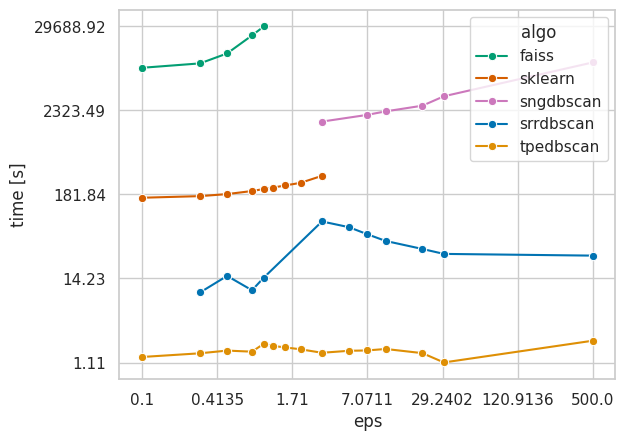

In [59]:
custom_palette = {"srrdbscan": palette[0], 
                  "tpedbscan": palette[1], 
                  "faiss": palette[2], 
                  "sklearn": palette[3], 
                  "sngdbscan": palette[4],
                  "IP.LSH.DBSCAN": palette[4]}

ax = sns.lineplot(data=times, x='eps', y='time', hue="algo", marker='o', palette=custom_palette)
ax.set_ylabel('time [s]')
ax.set_xscale("log")
ax.set_yscale("log")

# Set gridlines and ticks
x_log_min = np.log10(min(times['eps']))
x_log_max = np.log10(max(times['eps']))
xticks = np.logspace(x_log_min, x_log_max, num = 7)
xticks = [round(x, 4) for x in xticks]
y_log_min = np.log10(min(times['time']))
y_log_max = np.log10(max(times['time']))
yticks = np.logspace(y_log_min, y_log_max, num = 5)
yticks = [round(x, 2) for x in yticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

In [60]:
Algo = ['srrdbscan', 'sngdbscan', 'tpedbscan', 'faiss', 'sklearn', 'IP.LSH.DBSCAN']
eps = [0.5, 1.0, 3.0, 7.0, 30.0] # pamap2

M = [[0 for _ in range(len(eps))] for _ in range(len(Algo))]
x=0
y=0

for i in range(len(times)):
    if times["eps"][i] in eps:
        x = Algo.index(times["algo"][i])
        y = eps.index(times["eps"][i])
        M[x][y] = str(round(times["time"][i], 2))

for i in range(len(Algo)):
    for j in range(len(eps)):
        if M[i][j] == 0.0:
            M[i][j] = 'Missing'

for j in range(len(eps)):
    print(str("&"), eps[j], str("&"), 
          M[0][j], str("&"), 
          M[1][j], str("&"), 
          M[2][j], str("&"), 
          M[3][j], str("&"), 
          M[4][j], str(r"\\"))

& 0.5 & 15.37 & Missing & 1.6 & 13095.14 & 183.86 \\
& 1.0 & 14.61 & Missing & 1.97 & 29688.92 & 214.37 \\
& 3.0 & 80.16 & 1657.31 & 1.49 & Missing & 319.85 \\
& 7.0 & 54.68 & 2027.25 & 1.6 & Missing & Missing \\
& 30.0 & 29.96 & 3572.26 & 1.11 & Missing & Missing \\


In [61]:
for i in range(len(eps)): 
    print(eps[i])

0.5
1.0
3.0
7.0
30.0


## Collective running time plot

In [62]:
sets = {"aloi": [27, 0.0005, 0.2], 
    "celeba": [39, 0.4, 8.0], 
    "census": [500, 0.01, 10.0], 
    "gist": [960, 0.2, 10.0], 
    "glove": [100, 1, 20.0], 
    "household": [7, 0.01, 1000.0], 
    "mnist": [784, 500.0, 10000], 
    "pamap2": [4, 0.1, 500.0]}


data = []

for dataset in sets:
    for f in load_all_results(dataset, ".."):
        if dataset == "aloi" or dataset == "mnist" or dataset == "pamap2":
            if f.attrs['algo'] == 'srrdbscan' and f.attrs['params'][16:35].split(",")[0] == '0.1' and "1.0" in f.attrs['params'] :
                data.append({
                    "data": dataset,
                    "eps": (f.attrs['eps'] - sets[dataset][1])/(sets[dataset][2] - sets[dataset][1]),
                    #"eps": f.attrs['eps']/sets[dataset][1],
                    "time": f.attrs['time']/(len(f['labels'])*sets[dataset][0])
                    })
        else:
            if f.attrs['algo'] == 'srrdbscan' and f.attrs['params'][16:35].split(",")[0] == '0.1':
                data.append({
                    "data": dataset,
                    "eps": (f.attrs['eps'] - sets[dataset][1])/(sets[dataset][2] - sets[dataset][1]),
                    #"eps": f.attrs['eps']/sets[dataset][1],
                    "time": f.attrs['time']/(len(f['labels'])*sets[dataset][0])
                    })


df = pd.DataFrame(data=data)
df

,data,eps,time
0,aloi,0.248120,1.840308e-06
1,aloi,0.001504,4.312027e-07
2,aloi,0.007519,3.742121e-07
3,aloi,0.147870,2.600471e-06
4,aloi,0.097744,1.899839e-06
...,...,...,...
107,pamap2,0.019804,4.422527e-06
108,pamap2,1.000000,2.720755e-06
109,pamap2,1.000000,2.529102e-06
110,pamap2,0.002801,3.826029e-06


In [63]:
x_log_min = np.log10(min(df['eps']))
x_log_max = np.log10(max(df['eps']))

df['eps']

/tmp/ipykernel_287136/665235534.py:1: RuntimeWarning: divide by zero encountered in log10
  x_log_min = np.log10(min(df['eps']))


0      0.248120
1      0.001504
2      0.007519
3      0.147870
4      0.097744
         ...   
107    0.019804
108    1.000000
109    1.000000
110    0.002801
111    0.002801
Name: eps, Length: 112, dtype: float64

/tmp/ipykernel_287136/1709101797.py:4: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  ax = sns.lineplot(data=df, x='eps', y='time', hue="data", marker='o', markersize = 7, linewidth = 2.5, palette=palette)
/tmp/ipykernel_287136/1709101797.py:13: RuntimeWarning: divide by zero encountered in log10
  x_log_min = np.log10(min(df['eps']))
/home/cabi/.local/lib/python3.8/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/cabi/.local/lib/python3.8/site-packages/numpy/core/function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start


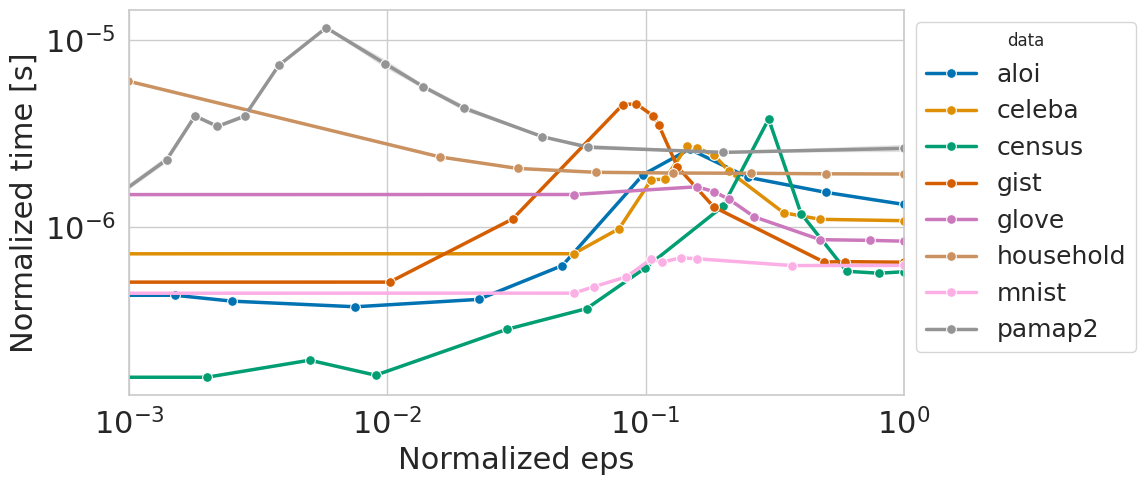

In [64]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax = sns.lineplot(data=df, x='eps', y='time', hue="data", marker='o', markersize = 7, linewidth = 2.5, palette=palette)
ax.set_xlim(0.001, 1)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("Normalized eps", fontsize = 22)
ax.set_ylabel("Normalized time [s]", fontsize = 22)

x_log_min = np.log10(min(df['eps']))
x_log_max = np.log10(max(df['eps']))
xticks = np.logspace(x_log_min, x_log_max, num = 7)
xticks = [round(x, 4) for x in xticks]
y_log_min = np.log10(min(df['time']))
y_log_max = np.log10(max(df['time']))
#yticks = np.logspace(y_log_min, y_log_max, num = 5)
#yticks = [round(x, 2) for x in yticks]
# ax.set_xticks(xticks)
#ax.set_xticklabels(xticks)
#ax.set_yticks(yticks)
#ax.set_yticklabels(yticks)

ax.xaxis.set_tick_params(labelsize = 22)
ax.yaxis.set_tick_params(labelsize = 22)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize = 18)

# Approximation factor analysis

In [75]:
dataset = 'pamap2'

exact_algorithm = 'tpedbscan'

In [76]:
data = []
exact_clustering = []

exact_data = {}
for f in load_all_results(dataset, ".."):
    if f.attrs['algo'] == exact_algorithm and f.attrs['minPts'] == 100:
        exact_data[f.attrs['eps']] = (np.array(f['labels']), np.array(f['corepoints']), np.array(f['borderpoints']))
        labels_true = np.array(f['labels'])
        points_clustered = len([x for x in np.array(labels_true) if x >= 0])
        exact_clustering.append({
            "eps": f.attrs['eps'],
            "fraction_clustered": points_clustered/len(labels_true)
        })
    elif f.attrs['minPts'] == 100:
        data.append({
            "clustering": np.array(f['labels']),
            "time": f.attrs['time'],
            "algo": f.attrs['algo'],
            "eps": f.attrs['eps'],
            "params": f.attrs.get("params", "")
        })


metrics = []

for eps, (gt_labels, corepoints, borderpoints) in exact_data.items():
    filtered_data = [d for d in data if d['eps'] == eps]
    # remove border points
    gt_labels[borderpoints] = -1
    #print("corepoints:", corepoints)
    for d in filtered_data:
        labels = d["clustering"]
        labels[borderpoints] = -1
        metrics.append({
            "eps": eps,
            "time": d['time'],
            "algo": d["algo"],
            "ARI": adjusted_rand_score(gt_labels, labels),
            "NMI": normalized_mutual_info_score(gt_labels, labels),
            "params": d.get("params", "")
        })

exact_clustering = pd.DataFrame(exact_clustering)
quality_df = pd.DataFrame(metrics)
# quality_df.sort_values(by=["eps", "ARI", "NMI"])

In [77]:
quality_srr = quality_df[(quality_df['algo'] == 'srrdbscan') & (quality_df['params'].str.contains('approx'))]
quality_srr.reset_index(drop=True, inplace=True)

for i in range(len(quality_srr)):
    quality_srr['params'][i] = f"c={float(quality_srr['params'][i].split()[4][7:-1])}"

quality_srr = quality_srr[['eps', 'time', 'ARI', 'params']].sort_values(['eps', 'params'])

/tmp/ipykernel_287136/3613940368.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_srr['params'][i] = f"c={float(quality_srr['params'][i].split()[4][7:-1])}"
/tmp/ipykernel_287136/3613940368.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_srr['params'][i] = f"c={float(quality_srr['params'][i].split()[4][7:-1])}"
/tmp/ipykernel_287136/3613940368.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_srr['param

/tmp/ipykernel_287136/3610274577.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.lineplot(data=quality_srr, x='eps', y='ARI', hue='params', marker='o', palette=palette)


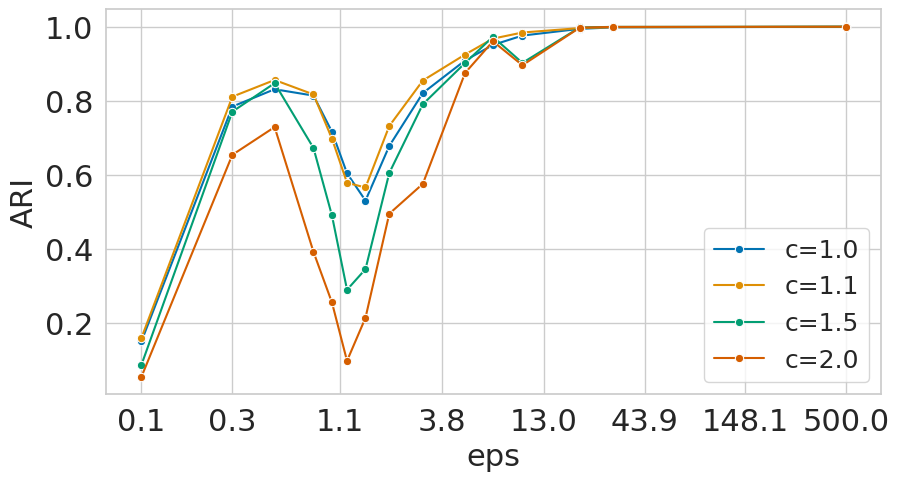

In [78]:
x_log_min = np.log10(min(exact_clustering['eps']))
x_log_max = np.log10(max(exact_clustering['eps']))

palette = sns.color_palette("colorblind")

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax = sns.lineplot(data=quality_srr, x='eps', y='ARI', hue='params', marker='o', palette=palette)

#ax.set_yscale('log')
ax.set_xscale('log')
ax.minorticks_on()
# ax2 = plt.twinx()
# sns.lineplot(ax=ax2, data=exact_clustering, x='eps', y='fraction_clustered', 
             # marker='d',
             # label="Fraction clustered",
             # color=palette[-1])
# plt.title(f"ARI score for different approximation factors - {dataset}", fontsize = 25)

# Collect handles and labels from both axes
handles, labels = ax.get_legend_handles_labels()
# handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the handles and labels
# handles += handles2
# labels += labels2

# Setting gridlines and ticks
xticks = np.logspace(x_log_min, x_log_max, num = 8) # number should be 8 for mnist, 7 for aloi
xticks = [round(x, 1) for x in xticks] # round should take -2, and add int() for mnist (nearest 100 and remove decimals), 4 for aloi, 1 for pamap2
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize = 22)
ax.set_xlabel('eps', fontsize = 22)

ax.yaxis.set_tick_params(labelsize = 22)
ax.set_ylabel('ARI', fontsize = 22)
# ax2.yaxis.set_tick_params(labelsize = 22)
# ax2.set_ylabel('Fraction clustered', fontsize = 22)

# Create a single legend
# ax2.get_legend().remove()
ax.legend(handles, labels, fontsize = 18)

/tmp/ipykernel_287136/862325775.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.lineplot(data=quality_srr, x='eps', y='time', hue='params', marker='o', palette=palette)


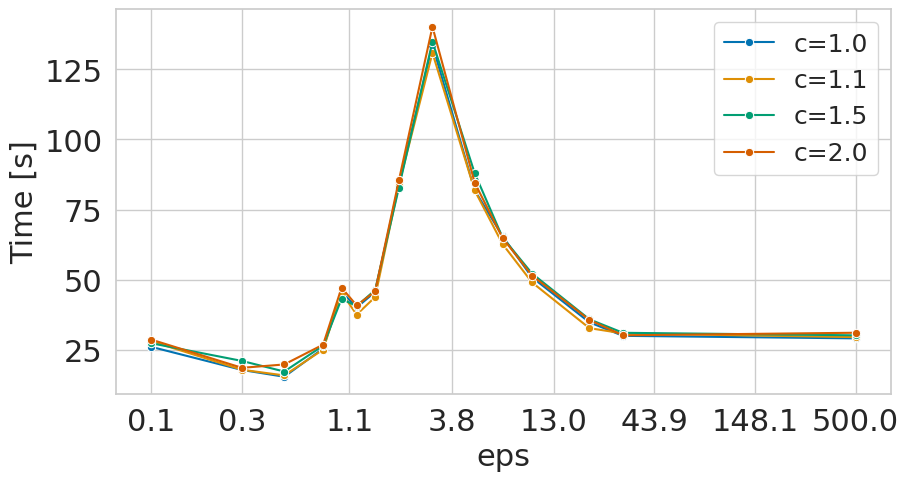

In [79]:
x_log_min = np.log10(min(exact_clustering['eps']))
x_log_max = np.log10(max(exact_clustering['eps']))

palette = sns.color_palette("colorblind")

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax = sns.lineplot(data=quality_srr, x='eps', y='time', hue='params', marker='o', palette=palette)

#ax.set_yscale('log')
ax.set_xscale('log')
ax.minorticks_on()
# ax2 = plt.twinx()
# sns.lineplot(ax=ax2, data=exact_clustering, x='eps', y='fraction_clustered', 
             # marker='d',
             # label="Fraction clustered",
             # color=palette[-1])
# plt.title(f"Running times for different approximation factors - {dataset}", fontsize = 25)

# Collect handles and labels from both axes
handles, labels = ax.get_legend_handles_labels()
# handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the handles and labels
# handles += handles2
# labels += labels2

# Setting gridlines and ticks
xticks = np.logspace(x_log_min, x_log_max, num = 8) # number should be 8 for mnist, 7 for aloi
xticks = [round(x, 1) for x in xticks] # round should take -2 and add int() for mnist (nearest 100 and remove decimals), 4 for aloi, 1 for pamap2 - you might also want to take int(round(x, -2)) for mnist
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.set_xticklabels(xticks, fontsize = 22)
ax.set_xlabel('eps', fontsize = 22)

ax.yaxis.set_tick_params(labelsize = 22)
ax.set_ylabel('Time [s]', fontsize = 22)
# ax2.yaxis.set_tick_params(labelsize = 22)
# ax2.set_ylabel('Fraction clustered', fontsize = 22)

# Create a single legend
# ax2.get_legend().remove()
ax.legend(handles, labels, fontsize = 18, loc="best") # loc = "center left" for aloi